In [1]:
### Import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import myLrRf as LrRf

In [2]:
### load the data
data_path = 'suv_data.csv'
suv = pd.read_csv(data_path)
suv

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
### construct X and y
X = suv.loc[:,["Gender", "Age", "EstimatedSalary"]]
X.loc[:,"Gender"] = (X.loc[:,"Gender"] == "Male")+0  ### manipulate categorical variable Male:1 Female:0
scaler = StandardScaler()
X.loc[:,["Age", "EstimatedSalary"]] = scaler.fit_transform(X.loc[:,["Age", "EstimatedSalary"]])

X

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751
...,...,...,...
395,0,0.797057,-0.844019
396,1,1.274623,-1.372587
397,0,1.179110,-1.460681
398,1,-0.158074,-1.078938


In [4]:
y = suv["Purchased"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [7]:
### construct logistic regression
test_size = 0.2
lr_para = {"solver": "liblinear", "penalty": "l1", "max_iter": 50}

model = LrRf.myLrRf(X, y, test_size, lr_para) ### Similarly, if you want to construct random forest model, just add ml_model="rf"

In [8]:
### multi seeds experiments
random_states = range(0,100)

model.experiment_multi(random_states=random_states)


/Users/hhy/Desktop/NIHDS/self_packages/logistic_regression/myLrRf.py:91: RuntimeWarning: divide by zero encountered in long_scalars
  std_lrn = np.sqrt(1/fn-1/(tp+fn)+1/tn-1/(fp+tn))
/Users/hhy/Desktop/NIHDS/self_packages/logistic_regression/myLrRf.py:43: RuntimeWarning: divide by zero encountered in log
  lower_bound = np.exp(np.log(value)-ci_half)
/Users/hhy/Desktop/NIHDS/self_packages/logistic_regression/myLrRf.py:44: RuntimeWarning: divide by zero encountered in log
  upper_bound = np.exp(np.log(value)+ci_half)
/Users/hhy/Desktop/NIHDS/self_packages/logistic_regression/myLrRf.py:44: RuntimeWarning: invalid value encountered in double_scalars
  upper_bound = np.exp(np.log(value)+ci_half)
/Users/hhy/Desktop/NIHDS/self_packages/logistic_regression/myLrRf.py:91: RuntimeWarning: divide by zero encountered in long_scalars
  std_lrn = np.sqrt(1/fn-1/(tp+fn)+1/tn-1/(fp+tn))
/Users/hhy/Desktop/NIHDS/self_packages/logistic_regression/myLrRf.py:43: RuntimeWarning: divide by zero encountered i

In [10]:
### return the results containing all the results
model.multi_result

,random_seed,Accuracy_train,AUC_train,Precision_train,Sensitivity_train,Specificity_train,Likelihood Ratio Positive_train,Likelihood Ratio Negative_train,F1 Score_train,Accuracy_val,AUC_val,Precision_val,Sensitivity_val,Specificity_val,Likelihood Ratio Positive_val,Likelihood Ratio Negative_val,F1 Score_val
0,0,0.834375,0.9126 (0.8782 - 0.9470),0.7429 (0.6705 - 0.8153),0.8595 (0.7976 - 0.9214),0.8191 (0.7656 - 0.8726),4.7511 (3.5047 - 6.4410),0.1715 (0.1099 - 0.2678),0.7969,0.9,0.9765 (0.9331 - 1.0199),0.7917 (0.6292 - 0.9541),0.8636 (0.7202 - 1.0070),0.9138 (0.8416 - 0.9860),10.0182 (4.2640 - 23.5373),0.1492 (0.0520 - 0.4284),0.8261
1,1,0.840625,0.9302 (0.8993 - 0.9611),0.7143 (0.6395 - 0.7891),0.9009 (0.8453 - 0.9565),0.8086 (0.7553 - 0.8619),4.7072 (3.5384 - 6.2621),0.1226 (0.0697 - 0.2156),0.7968,0.825,0.9128 (0.8489 - 0.9767),0.7045 (0.5697 - 0.8394),0.9688 (0.9085 - 1.0290),0.7292 (0.6035 - 0.8549),3.5769 (2.2393 - 5.7135),0.0429 (0.0062 - 0.2973),0.8158
2,2,0.85625,0.9312 (0.9003 - 0.9621),0.7372 (0.6635 - 0.8109),0.9099 (0.8566 - 0.9632),0.8278 (0.7766 - 0.8789),5.2825 (3.9020 - 7.1514),0.1088 (0.0601 - 0.1972),0.8145,0.8,0.9329 (0.8657 - 1.0001),0.7857 (0.6337 - 0.9377),0.6875 (0.5269 - 0.8481),0.8750 (0.7814 - 0.9686),5.5000 (2.5110 - 12.0471),0.3571 (0.2113 - 0.6037),0.7333
3,3,0.865625,0.9361 (0.9061 - 0.9661),0.7778 (0.7076 - 0.8479),0.8898 (0.8333 - 0.9463),0.8515 (0.8024 - 0.9005),5.9915 (4.2806 - 8.3862),0.1294 (0.0772 - 0.2168),0.8300,0.8,0.8873 (0.8030 - 0.9716),0.6552 (0.4822 - 0.8282),0.7600 (0.5926 - 0.9274),0.8182 (0.7162 - 0.9201),4.1800 (2.2886 - 7.6344),0.2933 (0.1444 - 0.5958),0.7037
4,4,0.85,0.9264 (0.8945 - 0.9583),0.7681 (0.6977 - 0.8385),0.8689 (0.8090 - 0.9288),0.8384 (0.7871 - 0.8897),5.3760 (3.8857 - 7.4380),0.1564 (0.0987 - 0.2480),0.8154,0.85,0.9306 (0.8612 - 1.0000),0.6667 (0.4889 - 0.8445),0.8571 (0.7075 - 1.0068),0.8475 (0.7557 - 0.9392),5.6190 (3.0039 - 10.5110),0.1686 (0.0588 - 0.4833),0.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.853125,0.9217 (0.8875 - 0.9559),0.7680 (0.6940 - 0.8420),0.8421 (0.7752 - 0.9090),0.8592 (0.8117 - 0.9067),5.9819 (4.2297 - 8.4599),0.1838 (0.1198 - 0.2818),0.8033,0.825,0.9371 (0.8765 - 0.9977),0.7273 (0.5753 - 0.8792),0.8276 (0.6901 - 0.9651),0.8235 (0.7189 - 0.9282),4.6897 (2.5336 - 8.6804),0.2094 (0.0934 - 0.4694),0.7742
96,96,0.8375,0.9309 (0.9008 - 0.9610),0.6939 (0.6194 - 0.7684),0.9358 (0.8898 - 0.9818),0.7867 (0.7315 - 0.8420),4.3878 (3.3704 - 5.7122),0.0816 (0.0397 - 0.1677),0.7969,0.8,0.9105 (0.8458 - 0.9752),0.7045 (0.5697 - 0.8394),0.9118 (0.8164 - 1.0071),0.7174 (0.5873 - 0.8475),3.2262 (2.0121 - 5.1731),0.1230 (0.0411 - 0.3679),0.7949
97,97,0.834375,0.9269 (0.8966 - 0.9572),0.6987 (0.6267 - 0.7707),0.9478 (0.9072 - 0.9885),0.7707 (0.7132 - 0.8283),4.1341 (3.2048 - 5.3329),0.0677 (0.0310 - 0.1481),0.8044,0.7625,0.9203 (0.8567 - 0.9839),0.6154 (0.4627 - 0.7681),0.8571 (0.7275 - 0.9868),0.7115 (0.5884 - 0.8347),2.9714 (1.8892 - 4.6735),0.2008 (0.0797 - 0.5056),0.7164
98,98,0.853125,0.9289 (0.8970 - 0.9608),0.7424 (0.6678 - 0.8170),0.8829 (0.8231 - 0.9427),0.8373 (0.7873 - 0.8874),5.4271 (3.9609 - 7.4362),0.1399 (0.0836 - 0.2339),0.8066,0.8125,0.9147 (0.8476 - 0.9818),0.7297 (0.5866 - 0.8728),0.8438 (0.7179 - 0.9696),0.7917 (0.6768 - 0.9066),4.0500 (2.2875 - 7.1706),0.1974 (0.0871 - 0.4473),0.7826


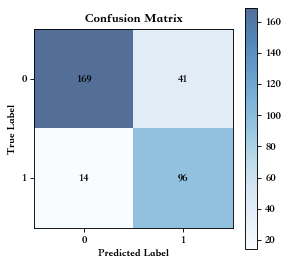

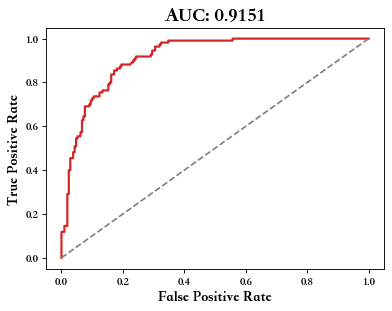

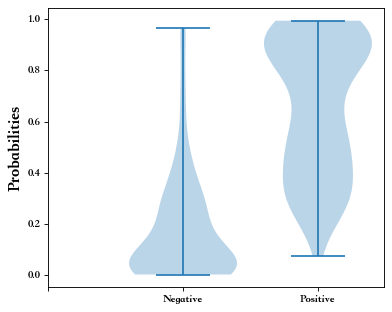

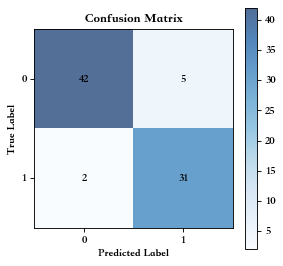

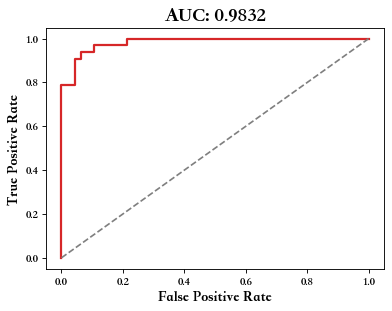

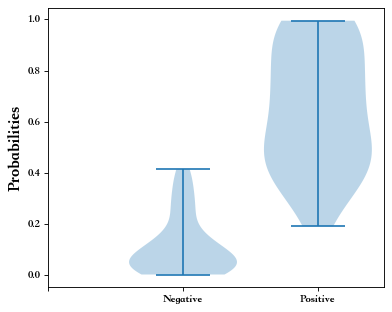

In [11]:
### Draw the basic metric graph
model.experiment_single(random_state=18)

In [12]:
### result display
# coefficient
model.coefficient

array([0.14837251, 2.0571713 , 1.02380659])

In [13]:
#intercept
model.intercept

array([-1.20465717])

In [14]:
# metric
model.metric

,Metric (alpha=0.05),Value,Lower bound,Upper bound
0,accuracy,0.912500,NaN,NaN
1,AUC,0.983200,0.952915,1.013485
2,Precision/Positive Predictive Value,0.861111,0.748142,0.974080
3,Recall/Sensitivity/True Positive Rate,0.939394,0.857985,1.020803
4,Specificity/True Negative Rate,0.893617,0.805469,0.981765
5,Likelihood Ratio Positive,8.830303,3.838499,20.313735
6,Likelihood Ratio Negative,0.067821,0.017637,0.260796
7,F1 Score,0.898551,NaN,NaN
